In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/banknotes.csv')

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
x = df.drop('Class', axis =1)

In [6]:
y = df['Class']

##### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [9]:
x_train.shape

(1029, 4)

In [10]:
x_test.shape

(343, 4)

##### model building

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf_rf = RandomForestClassifier(random_state=0, n_estimators = 10)

In [30]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 31.2 ms
Wall time: 22.3 ms


RandomForestClassifier(n_estimators=10, random_state=0)

##### performance Evaluation

In [16]:
y_pred = clf_rf.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [18]:
accuracy_score(y_test,y_pred)

0.9941690962099126

In [19]:
print(confusion_matrix(y_test,y_pred))

[[193   2]
 [  0 148]]


In [20]:
print(classification_report(y_test ,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [21]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [23]:
from sklearn.tree import plot_tree

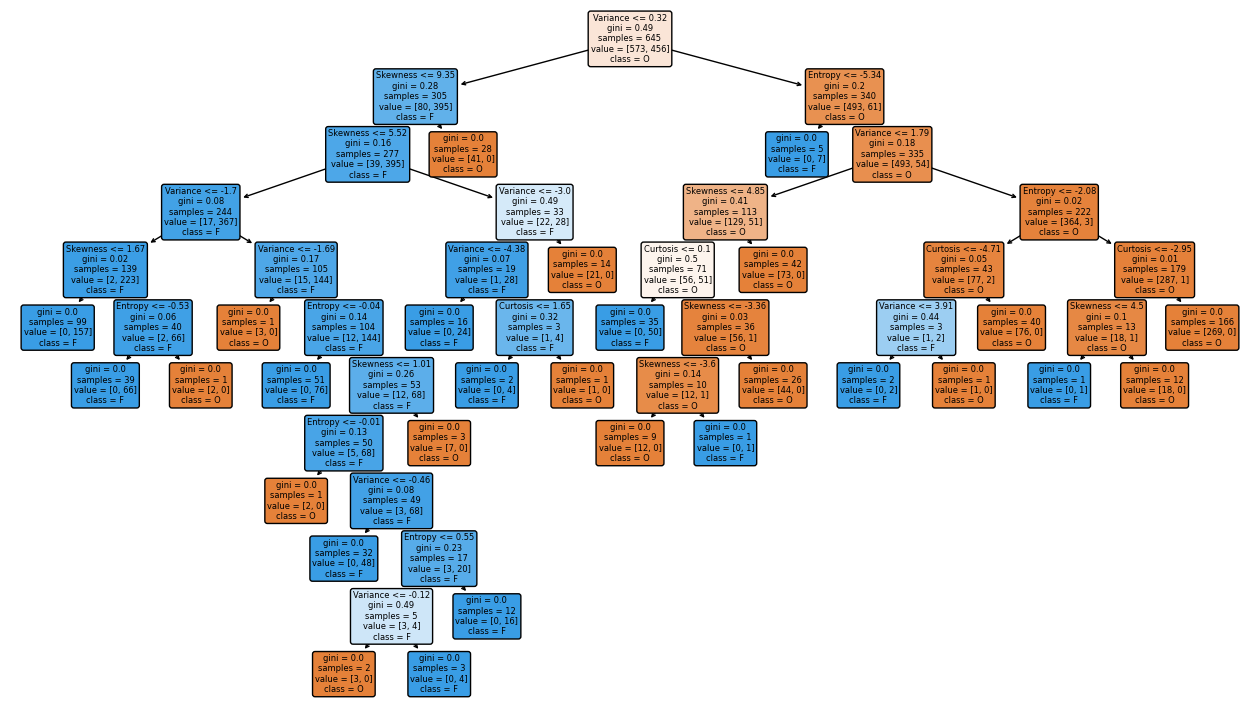

In [25]:

plt.figure(figsize=(16,9))
plot_tree(clf_rf.estimators_[3],fontsize=6,feature_names=x.columns,
         filled=True,precision=2,class_names=('O','F'),
         rounded=True);
plt.savefig('treerf.png')

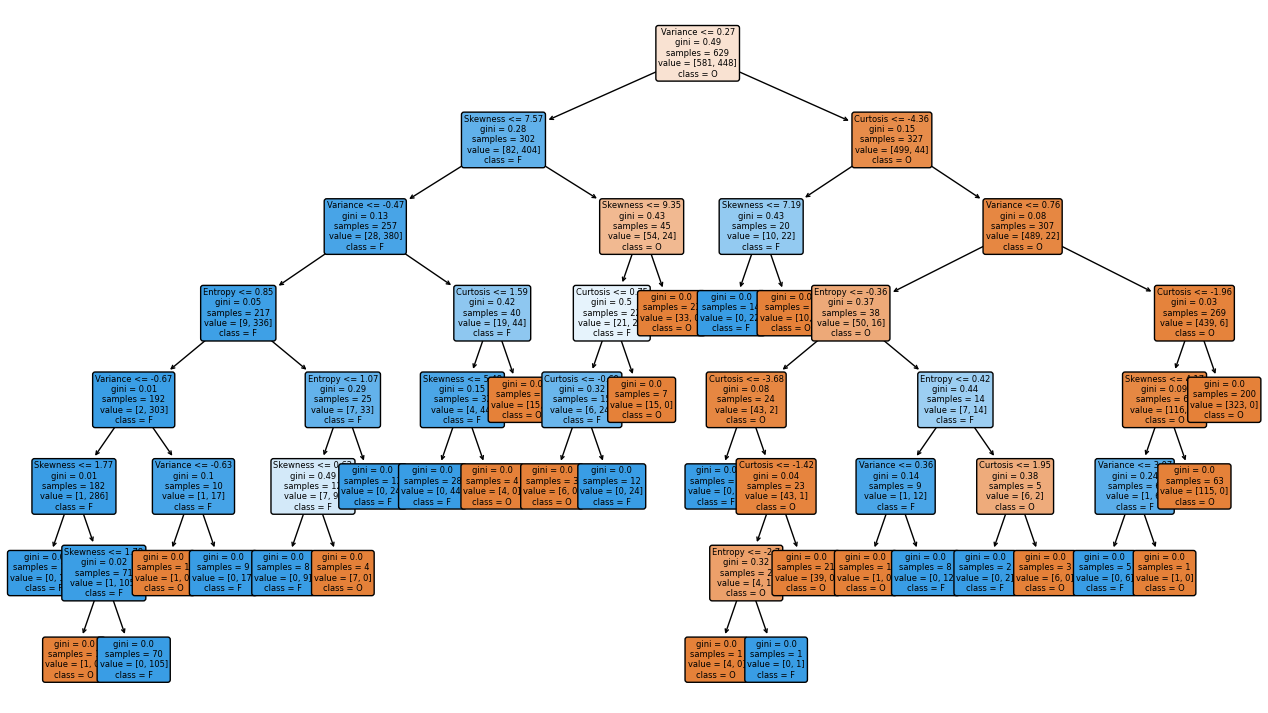

In [26]:
plt.figure(figsize=(16,9))
plot_tree(clf_rf.estimators_[9],fontsize=6,feature_names=x.columns,
         filled=True,precision=2,class_names=('O','F'),
         rounded=True);
plt.savefig('treerf.png')

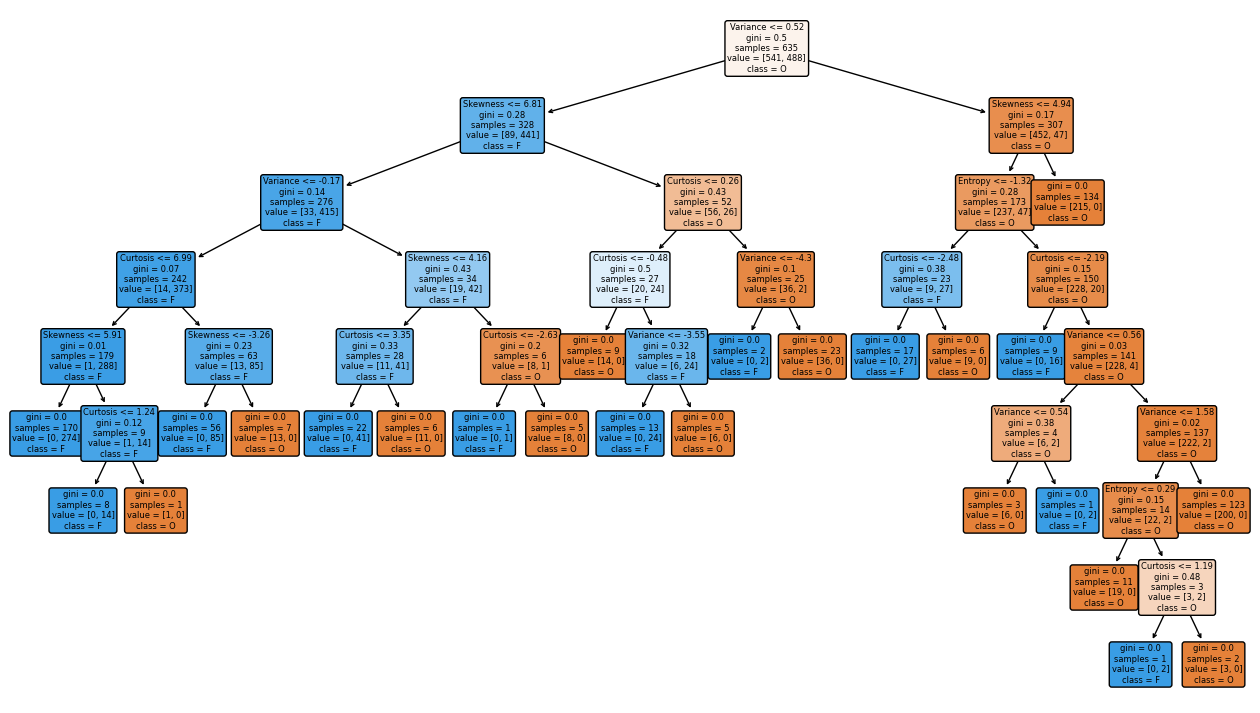

In [28]:
plt.figure(figsize=(16,9))
plot_tree(clf_rf.estimators_[0],fontsize=6,feature_names=x.columns,
         filled=True,precision=2,class_names=('O','F'),
         rounded=True);
plt.savefig('treerf.png')

In [29]:
clf_rf.bootstrap

True

In [40]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 15.6 ms
Wall time: 19.6 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)


In [42]:
%%time
clf_tree.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 3.51 ms


DecisionTreeClassifier(random_state=0)

In [43]:
import time

In [50]:
time.time()

1720681376.316627

In [51]:
time.asctime()

'Thu Jul 11 12:34:34 2024'

In [57]:
start = time.time()
clf_tree.fit(x_train,y_train)
end = time.time()
print ('Decision Tree :',end - start)

start = time.time()
clf_rf.fit(x_train,y_train)
end = time.time()
print ('random Forest :',end - start)

Decision Tree : 0.0019638538360595703
random Forest : 0.020000219345092773


In [58]:
start = time.time()
clf_tree.predict(x_test)
end = time.time()
print ('Decision Tree :',end - start)

start = time.time()
clf_rf.predict(x_test)
end = time.time()
print ('random Forest :',end - start)

Decision Tree : 0.0003807544708251953
random Forest : 0.0015027523040771484


In [59]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0
